In [2]:
# データ加工、処理、分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
sns.set()

# 機械学習ライブラリ
import sklearn 

# 小数第３位まで表示
%precision 3

'%.3f'

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 決定技クラスの初期化
tree = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)
scores = cross_val_score(tree, cancer.data, cancer.target, cv=5)

# 結果の表示
print('Cross validation scores: {}'.format(scores))
print('Cross validation scores: {:.3f}+-{:.3f}'.format(scores.mean(), scores.std()))

Cross validation scores: [0.904 0.912 0.956 0.939 0.956]
Cross validation scores: 0.933+-0.022


In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000,random_state=0)
scores = cross_val_score(model, cancer.data, cancer.target, cv=5)
print('Cross validation scores: {}'.format(scores))
print('Cross validation scores: {:.3f}+-{:.3f}'.format(scores.mean(), scores.std()))

Cross validation scores: [0.939 0.947 0.982 0.93  0.956]
Cross validation scores: 0.951+-0.018


ベストスコア:0.91
その時のパラメータ(gamma, C):(0.001, 1.0)


<Axes: >

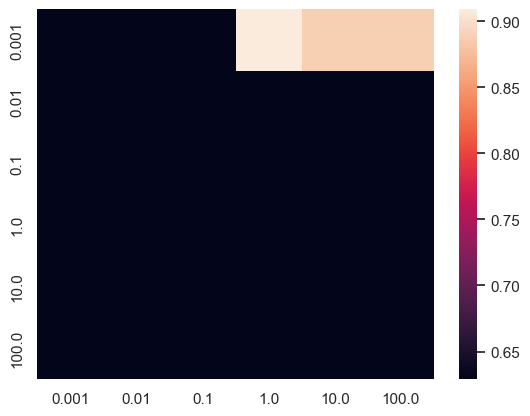

In [5]:
# インポート
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 乳がんデータの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

#ハイパーパラメータのすべての組み合わせでモデルを構築と検証
scores = {}
for gamma in np.logspace(-3, 2, num=6):
    for C in np.logspace(-3, 2, num=6):
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        scores[(gamma, C)] = svm.score(X_test, y_test)

# 検証結果をscoresに格納
scores = pd.Series(scores)
# 表示
print('ベストスコア:{:.2f}'.format(scores.max()))
print('その時のパラメータ(gamma, C):{}'.format(scores.idxmax()))
sns.heatmap(scores.unstack())

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# 乳がんデータの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

# GridSearchCVクラスに与えるパラメータを準備
param_grid = { 'C': np.logspace(-3, 2, num=6), 'gamma':np.logspace(-3, 2, num=6)}

# GridSearchCVクラスの初期化
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5)

# ハイパーパラメータの組み合わせの検証とベストモデルの構築
gs.fit(X_train, y_train)

# 表示
print('Best cross validation score:{:.3f}'.format(gs.best_score_))
print('Best parameters:{}'.format(gs.best_params_))
print('Test score:{:.3f}'.format(gs.score(X_test, y_test)))

Best cross validation score:0.925
Best parameters:{'C': 1.0, 'gamma': 0.001}
Test score:0.909


In [7]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

param_grid = {'max_depth': [2,3,4,5,], 'min_samples_leaf': [2,3,4,5]}
model = DecisionTreeClassifier(random_state=0)
gs = GridSearchCV(model, param_grid, cv=5)
gs.fit(X_train, y_train)

print('Best score validation score:{:.3f}'.format(gs.best_score_))
print('Best parameters:{}'.format(gs.best_params_))
print('Test score:{:.3f}'.format(gs.score(X_test, y_test)))

Best score validation score:0.941
Best parameters:{'max_depth': 4, 'min_samples_leaf': 5}
Test score:0.923


In [8]:
from sklearn.svm import SVC

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# クラスの初期化と学習
model = SVC(gamma=0.001, C=1)
model.fit(X_train, y_train)
# 表示
print('{} train score: {:.3f}'.format(model.__class__.__name__, model.score(X_train, y_train)))
print('{} test score: {:.3f}'.format(model.__class__.__name__, model.score(X_test, y_test)))

SVC train score: 0.979
SVC test score: 0.909


In [9]:
# インポート
from sklearn.metrics import confusion_matrix

# テストデータを使って予測値を算出
y_pred = model.predict(X_test)
m = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n{}'.format(m))

Confusion matrix:
[[48  5]
 [ 8 82]]


In [10]:
accuracy = (m[0,0] + m[1, 1]) / m.sum()
print('正解率:{:.3f}'.format(accuracy))

正解率:0.909


In [11]:
# 適合率の計算
precision = (m[1,1]/m[:, 1].sum())
# 再現率の計算
recall = (m[1,1])/m[1, :].sum()
# F1スコアの計算
f1 = 2 * (precision * recall) / (precision + recall)

print('適合率:{:.3f}'.format(precision))
print('再現率:{:.3f}'.format(recall))
print('F1値:{:.3f}'.format(f1))

適合率:0.943
再現率:0.911
F1値:0.927


In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('適合率:{:.3f}'.format(precision_score(y_test, y_pred)))
print('再現率:{:.3f}'.format(recall_score(y_test, y_pred)))
print('F1値:{:.3f}'.format(f1_score(y_test, y_pred)))

適合率:0.943
再現率:0.911
F1値:0.927


In [13]:
from sklearn.metrics import accuracy_score
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

model = LogisticRegression(max_iter=10000, random_state=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('正解率:{:.3f}'.format(accuracy_score(y_test, y_pred)))
print('適合率:{:.3f}'.format(precision_score(y_test, y_pred)))
print('再現率:{:.3f}'.format(recall_score(y_test, y_pred)))
print('F1値:{:.3f}'.format(f1_score(y_test, y_pred)))

正解率:0.937
適合率:0.955
再現率:0.944
F1値:0.950


In [14]:
# インポート
from sklearn.linear_model import LogisticRegression

# 乳がんのデータ読み込み
cancer = load_breast_cancer()
# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=66)

# LogisticRegressionクラスの初期化と学習
model = LogisticRegression(max_iter=10000, random_state=0)
model.fit(X_train, y_train)

# テスト用データの予測確立を計算
results = pd.DataFrame(model.predict_proba(X_test), columns=cancer.target_names)

# 先頭の5行を表示
results.head()

,malignant,benign
0,0.000502,0.999498
1,0.000010,0.999990
2,0.003050,0.996950
3,0.001333,0.998667
4,0.000874,0.999126


In [15]:
# 良性(benign)クラスの予測確立が0.4, 0.3, 0.15, 0.05以上なら、それぞれの列に１を設定する
for threshold in [0.4, 0.3,0.15,0.05]:
    results[f'flag_{threshold}'] = results['benign'].map(lambda x : 1 if x > threshold else 0)

results.head(10)

,malignant,benign,flag_0.4,flag_0.3,flag_0.15,flag_0.05
0,0.000502,0.999498,1,1,1,1
1,0.000010,0.999990,1,1,1,1
2,0.003050,0.996950,1,1,1,1
3,0.001333,0.998667,1,1,1,1
4,0.000874,0.999126,1,1,1,1
5,0.001362,0.998638,1,1,1,1
6,0.000459,0.999541,1,1,1,1
7,0.000532,0.999468,1,1,1,1
8,0.930435,0.069565,0,0,0,1
9,0.191546,0.808454,1,1,1,1


<Axes: xlabel='false positive rate', ylabel='true positive rate'>

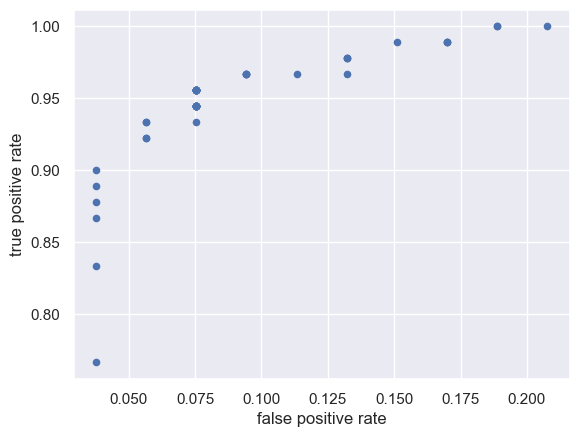

In [16]:
rates = {}
for threshold in np.linspace(0.01, 0.99, num=50):
    labels = results['benign'].map(lambda x : 1 if x > threshold else 0)
    m = confusion_matrix(y_test, labels)
    rates[threshold] = {'false positive rate': m[0,1] / m[0, :].sum(), 'true positive rate': m[1,1] / m[1, :].sum()}

# 横軸をfalse positive rate, 縦軸をtrue positive rateとしてプロット
pd.DataFrame(rates).T.plot.scatter('false positive rate', 'true positive rate')

In [17]:
# インポート
from sklearn import svm
from sklearn.metrics import roc_curve, auc
# 乳がんデータの読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.5, random_state=66)

# SVCによる予測確率の取得
model = svm.SVC(kernel='linear', probability=True, random_state=0)
model.fit(X_train, y_train)

# 予測確率を取得
y_pred = model.predict_proba(X_test)[:,1]

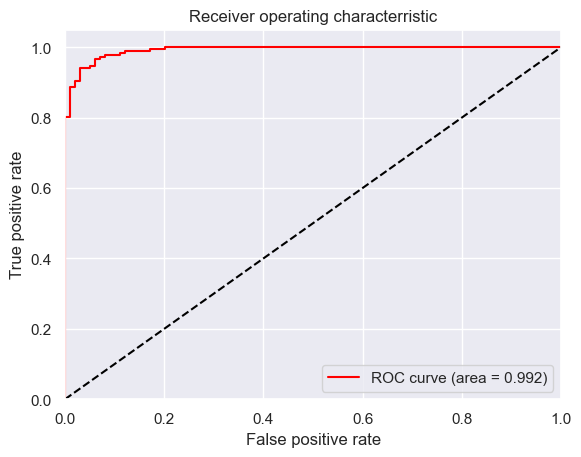

In [18]:
# 偽陽性確率と真陽性確率の算出
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

#AUCの算出
auc = auc(fpr, tpr)

# ROC曲線の描画
plt.plot(fpr, tpr, color='red', label = 'ROC curve (area = %.3f)' % auc)
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characterristic')
plt.legend(loc="best")

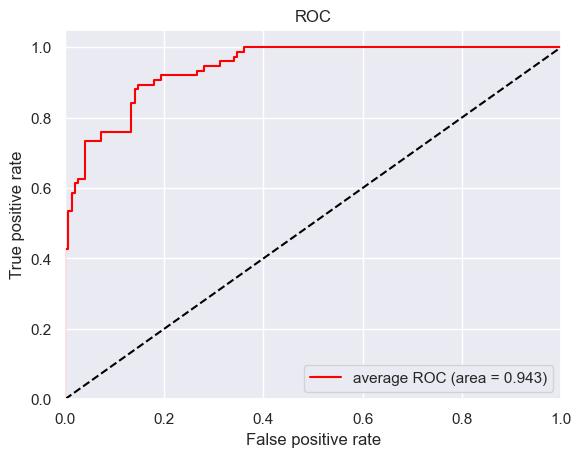

In [19]:
from sklearn.datasets import load_iris
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data
y = iris.target
y = label_binarize(y, classes=[0,1,2])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

model = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=0))
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test.ravel(), y_prob.ravel())
auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', label= 'average ROC (area = {:.3f})'.format(auc))
plt.plot([0,1],[0,1],color='black', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend(loc = 'best')

In [20]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name = 'MEDV')

# Xとyを結合して先頭の5行を表示
X.join(y).head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
# インポート
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# 標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# モデルの設定
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=0),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=0),
    'LinearSVR': LinearSVR(dual=True,max_iter=10000,random_state=0)
}

# 評価値の計算
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'MSE')] = mean_squared_error(y_test, model.predict(X_test))
    scores[(model_name, 'MAE')] = mean_absolute_error(y_test, model.predict(X_test))
    scores[(model_name, 'MedAE')] = median_absolute_error(y_test, model.predict(X_test))
    scores[(model_name, 'R2')] = r2_score(y_test, model.predict(X_test))

pd.Series(scores).unstack()

,MAE,MSE,MedAE,R2
DecisionTreeRegressor,0.486836,0.563154,0.289500,0.579518
LinearRegression,0.533041,0.534010,0.414231,0.601279
LinearSVR,0.518601,3.430819,0.343333,-1.561637
Ridge,0.533038,0.534025,0.414267,0.601268


In [22]:
# インポート
from sklearn.ensemble import BaggingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# 乳がんのデータを読み込み
cancer = load_breast_cancer()

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=66)

# k-NNモデルと其のバギングの設定
models = {
    'kNN': KNeighborsClassifier(),
    'bagging': BaggingClassifier(KNeighborsClassifier(), n_estimators=100, random_state=0)
}

# モデル構築
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)

pd.Series(scores).unstack()

KeyboardInterrupt: 

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data, iris.target, test_size=0.5, random_state=0)

models = {
    'kNN': KNeighborsClassifier(),
    'Bagging': BaggingClassifier(KNeighborsClassifier(), n_estimators=100, random_state=0)
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'Train')] = model.score(X_train,y_train)
    scores[(model_name, 'Test')] = model.score(X_test, y_test)

pd.Series(scores).unstack()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
# housingデータを読み込み
california = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, random_state=66)

# 決定木とAdaBoostRegressorのパラメーター設定
models = {
    'tree': DecisionTreeRegressor(random_state=0),
    'AdaBoost': AdaBoostRegressor(DecisionTreeRegressor(), random_state=0)
}

# モデル構築
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train score')] = model.score(X_train, y_train)
    scores[(model_name, 'test score')] = model.score(X_test, y_test)
    
# 結果を表示
pd.Series(scores).unstack()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, random_state=0)

model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME')
model.fit(X_train, y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train, y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test, y_test)))


In [ ]:
# インポート
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(
    california.data, california.target, random_state=66)

# ランダムフォレストと購買ブースティングのパラメータ設定
models = {
    'RandomForest': RandomForestRegressor(random_state=0),
    'GradientBoost': GradientBoostingRegressor(random_state=0)
}

# モデル構築
scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, y_test)

pd.Series(scores).unstack()

In [ ]:
s = pd.Series(models['RandomForest'].feature_importances_, index=california.feature_names)
s.sort_values(ascending=False).plot(kind='bar', color='C0')

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, random_state=0)

models = {
    'RandomForest': RandomForestClassifier(random_state=0),
    'GrdientBoosting': GradientBoostingClassifier(random_state=0)
}
score={}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    score[(model_name, 'train_score')] = model.score(X_train, y_train)
    score[(model_name, 'test_score')] = model.score(X_test, y_test)

pd.Series(score).unstack()

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

cancer = load_breast_cancer()

models = {
    'Logistic': LogisticRegression(random_state=0),
    'SVM': LinearSVC(random_state=0),
    'DecisionTree':DecisionTreeRegressor(random_state=0),
    'kNN': KNeighborsRegressor(),
    'RandomForest': RandomForestRegressor(random_state=0),
    'GradientBoost': GradientBoostingRegressor(random_state=0)
}
scores={}
for model_name, model in models.items():
    score = cross_val_score(model, cancer.data, cancer.target, cv=5)
    scores[model_name] = score.mean()
pd.Series(scores)